In [4]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
%config InlineBackend.figure_format= 'retina' #sharper plots

In [5]:
def plotFigure():
  apple_height, apple_width = df.height[df.fruit == 'Apple'], df.width[df.fruit== 'Apple']
  mandarin_height, mandarin_width = df.height[df.fruit == 'Mandarin'], df.width[df.fruit== 'Mandarin']
  lemon_height, lemon_width = df.height[df.fruit == 'Lemon'], df.width[df.fruit== 'Lemon']

  fig, ax = plt.subplots()
  plt.gca().set_aspect('equal', adjustable='box')
  # Plot defined variables on it
  ax.plot(apple_height, apple_width, 'o', color='r', label='apple')
  ax.plot(mandarin_height, mandarin_width, 'o', color='g', label='mandarin')
  ax.plot(lemon_height, lemon_width, 'o', color='b', label='lemon')

  # Show legend and configure graph's size
  plt.legend()
  plt.ylim(3, 10)
  plt.xlim(3, 11)
  plt.title('KNN Fruits Scatter Plot')
  plt.xlabel("height")
  plt.ylabel("width")


In [17]:
# Create a function to plot KNN's decision regions
def plotKNN(
    n_neighbors=int,
            plot_data=True,
            plot_height=None,
            plot_width=None,
            plot_labels=None):

    # Turn categorical target variable into numerical to make a graph
    X = df[['height', 'width']].values
    y_encoded = df["fruit"].astype('category').cat.codes #encoded y

    # Create color maps for graph
    cmap_light = ListedColormap(['pink', 'lightblue', 'lightgreen'])
    cmap_bold = ['green', 'red', 'blue']

    # We want to visualize KNN with 1 nearest neighbor.
    # Let's initialize the model and train it with the dataset
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X, y_encoded)

    # Plot the decision boundary. For that, we will assign a color to each point in the mesh
    x_min, x_max = X[:, 0].min() - 3, X[:, 0].max() + 3
    y_min, y_max = X[:, 1].min() - 3, X[:, 1].max() + 3

    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    if plot_data==True:
        # Plot also the dataset observations
        sns.scatterplot(x=plot_height,
                        y=plot_width,#y=X[:, 1],
                        hue=plot_labels,#df.fruit.values,
                        palette=cmap_bold,
                        alpha=1.0,
                        edgecolor="black")

    # Configure the graph
    plt.ylim(3, 10)
    plt.xlim(3, 11)
    plt.gca().set_aspect('equal', adjustable='box')

    plt.title(f'KNN Fruits Classifier, n={n_neighbors}')
    plt.xlabel("height")
    plt.ylabel("width")

In [14]:
#create a hypothetical dataset
data = {'height': [3.91, 7.09, 10.48, 9.21, 7.95, 7.62, 7.95, 4.69, 7.50, 7.11, 4.15, 7.29, 8.49, 7.44, 7.86, 3.93, 4.40, 5.5, 8.10, 8.69],
        'width': [5.76, 7.69, 7.32, 7.20, 5.90, 7.51, 5.32, 6.19, 5.99, 7.02, 5.60, 8.38, 6.52, 7.89, 7.60, 6.12, 5.90, 4.5, 6.15, 5.82],
        'fruit': ['Mandarin', 'Apple', 'Lemon', 'Lemon', 'Lemon', 'Apple', 'Mandarin', 'Mandarin', 'Lemon', 'Apple', 'Mandarin', 'Apple', 'Lemon', 'Apple', 'Apple', 'Apple', 'Mandarin', 'Lemon', 'Lemon', 'Lemon']
       }

#transform dataset into a DataFrame df using pandas library
df = pd.DataFrame(data)

#print the output
df

,height,width,fruit
0,3.91,5.76,Mandarin
1,7.09,7.69,Apple
2,10.48,7.32,Lemon
3,9.21,7.20,Lemon
4,7.95,5.90,Lemon
5,7.62,7.51,Apple
6,7.95,5.32,Mandarin
7,4.69,6.19,Mandarin
8,7.50,5.99,Lemon
9,7.11,7.02,Apple


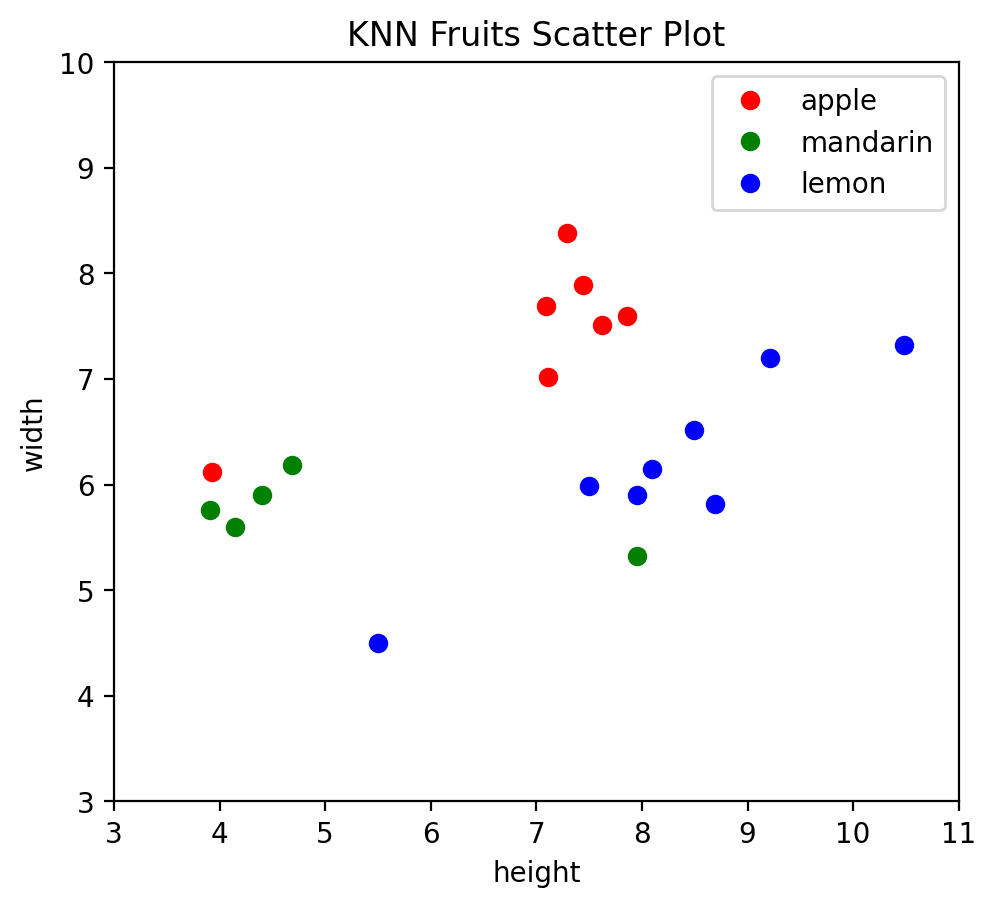

In [13]:
plotFigure()

In [15]:
X = df[['height', 'width']].values
y = df.fruit.values
# Initialize the KNN model with 1 nearest neighbor
clf = KNeighborsClassifier(n_neighbors = 1)
# Feed the dataset into the model to train
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

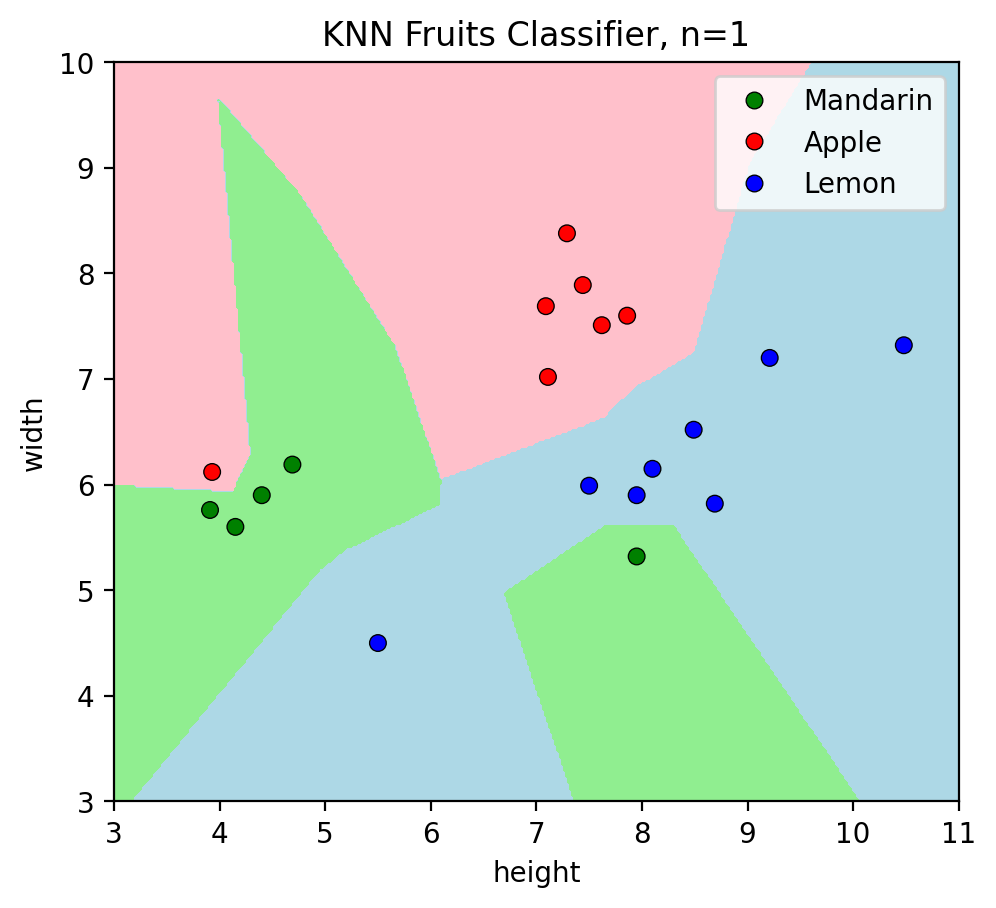

In [18]:
plotKNN(n_neighbors=1,
        plot_height= df['height'],
        plot_width = df['width'],
        plot_labels=df.fruit.values)

In [21]:
# Predict values for the training set
y_pred_train = clf.predict(X)

# Output of predicted labels
y_pred_train

# Output of actual labels
y

train_score=metrics.accuracy_score(y, y_pred_train)
print(train_score)
train_error =1-train_score
print("Train Error :", train_error)

1.0
Train Error : 0.0


In [22]:
# Compose the Test set
test_data = pd.DataFrame({'height': [4, 4.47, 6.49, 7.51, 8.34],
                            'width': [6.5, 7.13, 7, 5.01, 4.23],
                            'fruit': ['Mandarin', 'Mandarin', 'Apple', 'Lemon', 'Lemon']})

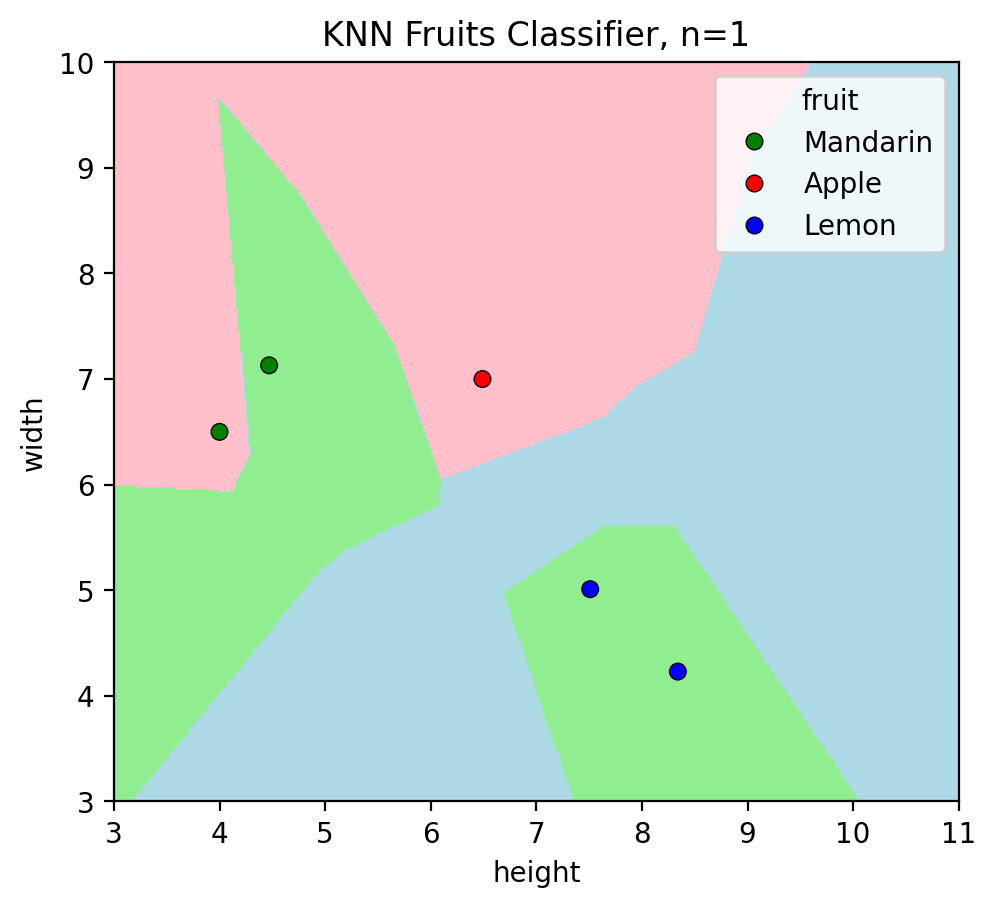

In [23]:
# Visualize the Test set on the trained model

plotKNN(n_neighbors=1,
        plot_height=test_data.height,
        plot_width=test_data.width,
        plot_labels=test_data.fruit)

In [27]:
test_X= test_data[['height', 'width']].values
test_y = test_data.fruit.values
pred = clf.predict(test_X)
print(pred)

#count of incorrect prediction by the model
incorrect_count = np.sum(pred != test_y)
print(f"Number of incorrect predictions: {incorrect_count}")

['Apple' 'Mandarin' 'Apple' 'Mandarin' 'Mandarin']
Number of incorrect predictions: 3


**Model Complexity Analysis**



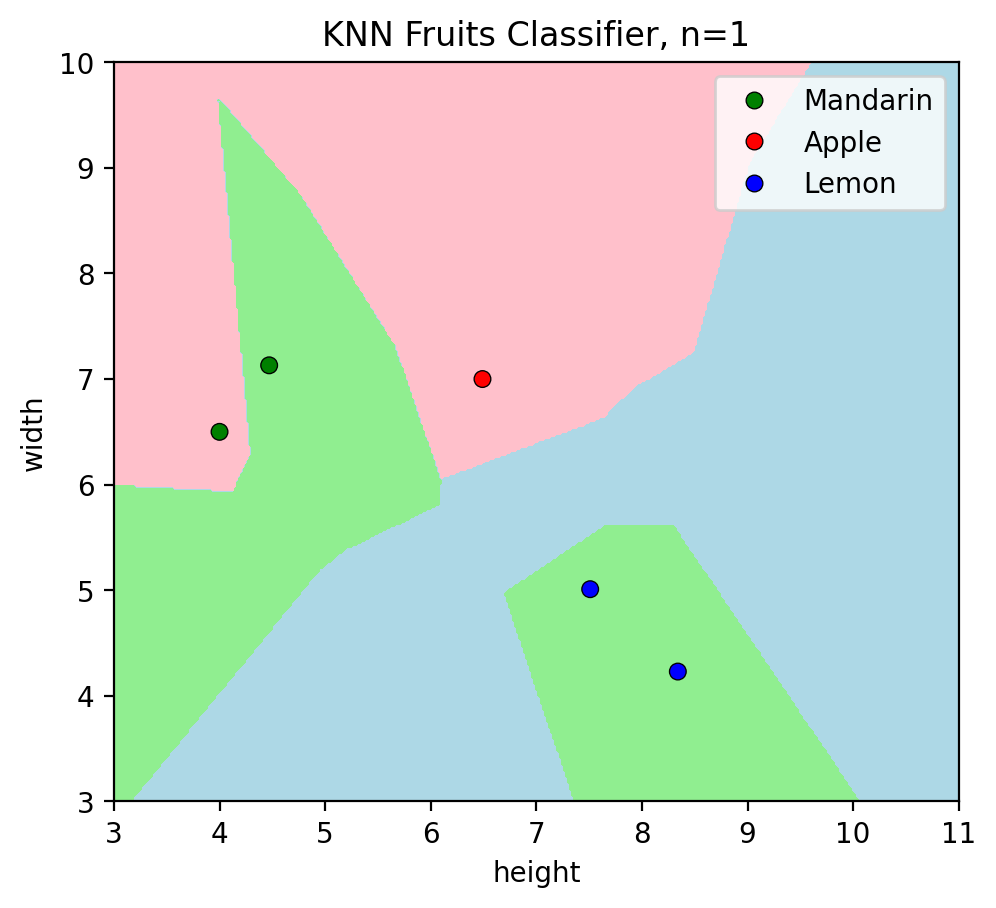

In [29]:
# When k=1

plotKNN(n_neighbors=1, #selecting k=1
        plot_height= test_data.height,
        plot_width = test_data.width,
        plot_labels=test_data.fruit.values)

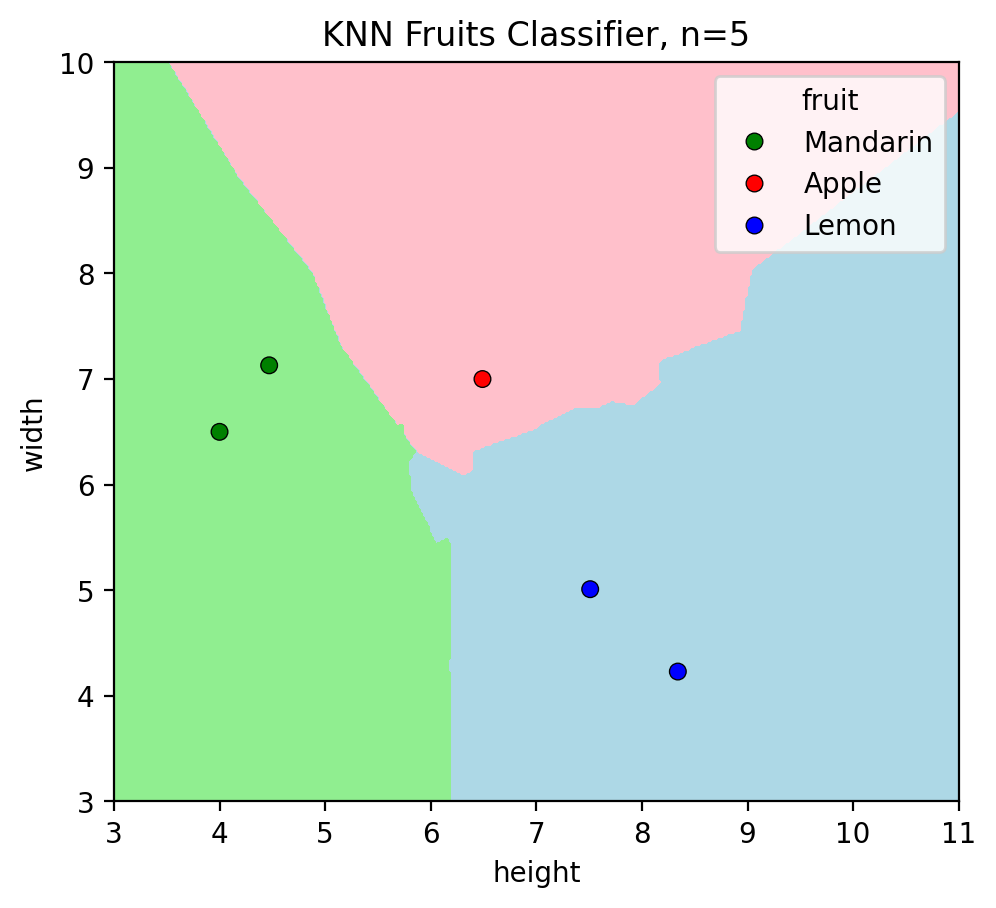

In [30]:
# when k=5
plotKNN(n_neighbors=5,
        plot_height=test_data.height,
        plot_width=test_data.width,
        plot_labels=test_data.fruit)

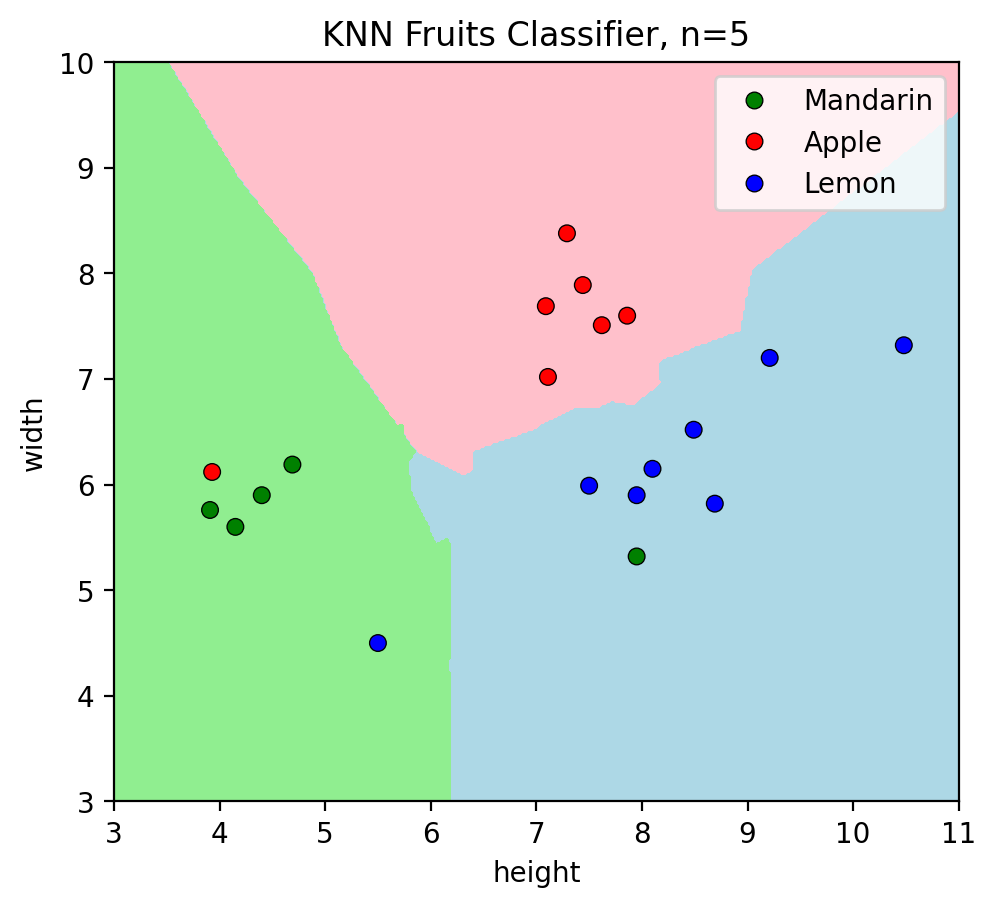

In [31]:
plotKNN(n_neighbors=5, #selecting k=5
        plot_height= df['height'],
        plot_width = df['width'],
        plot_labels=df.fruit.values)

In [32]:
# Define X and y using the dataset
X = df[['height', 'width']].values
y = df.fruit.values

train_errors = []
test_errors = []

k = []
test_misclassifications = []
train_misclassifications = []

for i in range(len(X)):
    _k = i+1

    # STEP 1: Again, initialize the model
    clf = KNeighborsClassifier(n_neighbors = _k)
    clf.fit(X, y)

    # STEP 2: make predictions on the test and train sets
    y_pred_train = clf.predict(X)
    y_pred_test = clf.predict(test_data[['height', 'width']])

    # STEP 4: Compare actual response values (y_train and y_test) with predicted response values (y_pred_train, y_pred_test)
    train_score = metrics.accuracy_score(y, y_pred_train)
    test_score = metrics.accuracy_score(test_data[['fruit']], y_pred_test)

    # STEP 5: Calculate train error and test error
    _train_error = round(1-train_score,2)
    _test_error = round(1-test_score,2)


    k.append(_k)
    train_errors.append(_train_error)
    test_errors.append(_test_error)

    print(f'k={_k} | train error: {train_errors[i]} | test error: {test_errors[i]} | train misclassifications: {_train_error*len(X)} | test misclassifications: {_test_error*len(test_data)}')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature nam

k=1 | train error: 0.0 | test error: 0.6 | train misclassifications: 0.0 | test misclassifications: 3.0
k=2 | train error: 0.05 | test error: 0.4 | train misclassifications: 1.0 | test misclassifications: 2.0
k=3 | train error: 0.15 | test error: 0.0 | train misclassifications: 3.0 | test misclassifications: 0.0
k=4 | train error: 0.15 | test error: 0.0 | train misclassifications: 3.0 | test misclassifications: 0.0
k=5 | train error: 0.15 | test error: 0.0 | train misclassifications: 3.0 | test misclassifications: 0.0
k=6 | train error: 0.15 | test error: 0.0 | train misclassifications: 3.0 | test misclassifications: 0.0
k=7 | train error: 0.15 | test error: 0.0 | train misclassifications: 3.0 | test misclassifications: 0.0
k=8 | train error: 0.15 | test error: 0.0 | train misclassifications: 3.0 | test misclassifications: 0.0
k=9 | train error: 0.15 | test error: 0.2 | train misclassifications: 3.0 | test misclassifications: 1.0
k=10 | train error: 0.15 | test error: 0.4 | train miscl

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature nam

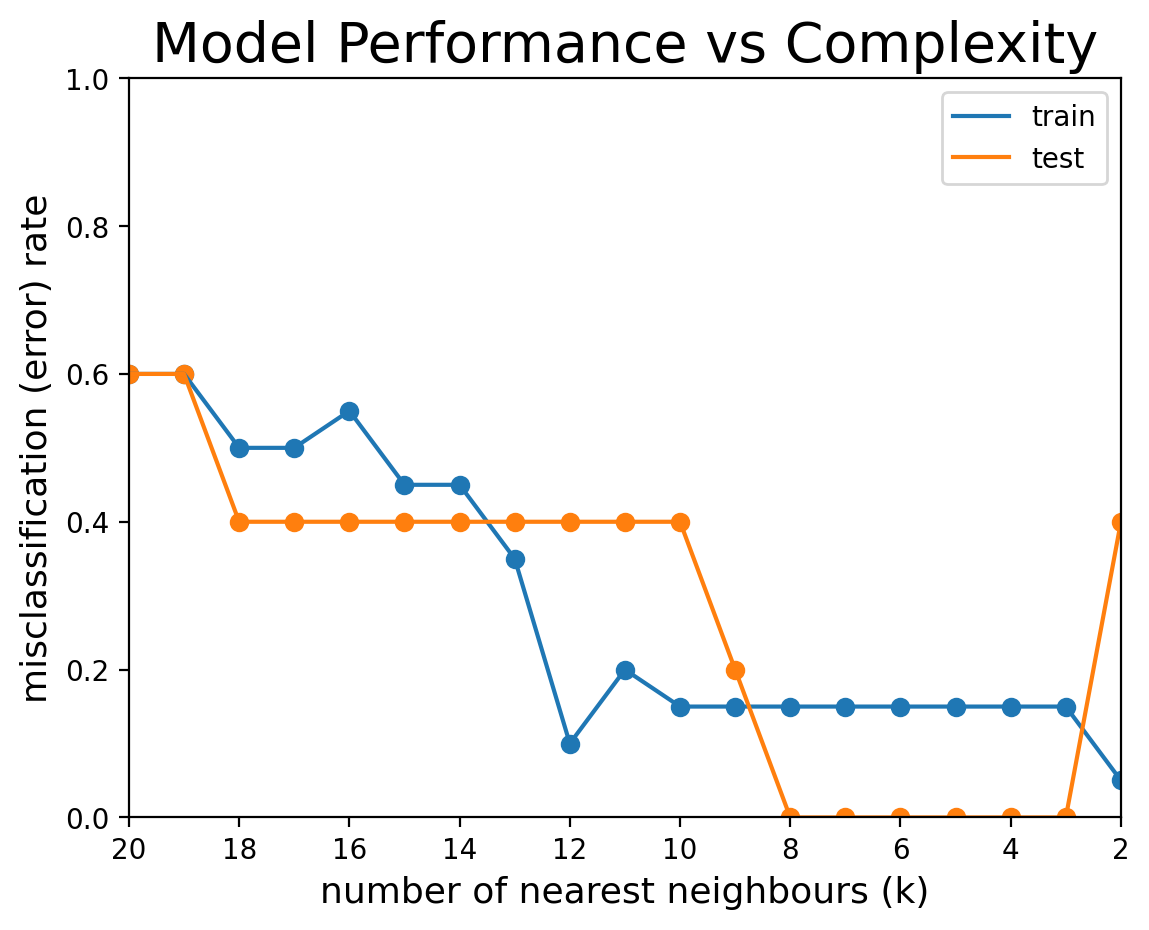

In [33]:
# Plot train error rates
plt.scatter(k, train_errors) #function
plt.plot(k, train_errors, '-', label='train') #data points

# Plot test error rates
plt.scatter(k, test_errors) #function
plt.plot(k, test_errors, '-', label='test') #data points

# Plot configurations
plt.axis([max(k),min(k)+1, 0, 1])
plt.xlabel('number of nearest neighbours (k)', size = 13)
plt.ylabel('misclassification (error) rate', size = 13)
plt.title('Model Performance vs Complexity', size = 20)
plt.legend()

# Output
plt.show()